In [15]:
import torch
import math as ma

def generate_dataset(N = 1000):
    #Fait un tensor N*2 (ensemble de coordonnées (x,y))
    inp = torch.empty(N, 2).uniform_(0, 1) 
    #centre du cercle en 0.5
    a = torch.subtract(inp, 0.5)
    #équation de cercle
    clas = a.pow(2).sum(1).sub(1 / (2*ma.pi)).sign().div(-1).add(1).div(2).long()
    return inp, clas

In [310]:
inp = torch.empty(4, 2).uniform_(0, 1) 
inp = torch.cat((inp, torch.Tensor([0, 1/ma.sqrt(2*ma.pi)]).unsqueeze(0)))
print(inp)
a = torch.subtract(inp, 0.5)
clas = a.pow(2).sum(1).sub(1 / (2*ma.pi)).sign().div(-1).add(1).div(2).long()
print(clas)

plt.scatter(inp[])

tensor([[0.4264, 0.8324],
        [0.2683, 0.5691],
        [0.3087, 0.3287],
        [0.1335, 0.6630],
        [0.0000, 0.3989]])
tensor([1, 1, 1, 0, 0])


In [174]:
'''
def LossMSE(input, weights, bias, target):
    N = np.size(target)
    L = torch.sum(torch.pow(output - target,2))/N
    dL_dw = 2 * torch.mul(input, torch.mul(f_prim(input,weights,bias) , (f(input,weights,bias) - target))) /N
    dL_dB = 2 * torch.mul(f_prim(input,weights,bias) , (f(input,weights,bias) - target)) /N
    return L , dL_dw , dL_dB
'''
#some activation functions
######################################################################

def tanh(x):
    y = torch.tanh(x).add(1).div(2)
    return y

def dtanh(x):
    y = (1 - torch.pow(tanh(x),2)).div(2)
    return y

def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

######################################################################

def relu(x):
    a = x.sign().add(1).div(2).long()
    return torch.mul(a,x)

def drelu(x):
    return x.sign().add(1).div(2).long()
######################################################################




def BCELoss(targets, value):
    n = len(targets)
    loss = (1/n) * torch.sum(torch.max(value, 0) - value * targets + torch.log(
                                                    1 + torch.exp(- torch.abs(value))))
    dloss = (1/n) * ((1/(1+torch.exp(- value))) - targets) 
    return loss, dloss





#Loss
def loss(value, targets):
    return torch.sum(torch.maximum(value, torch.zeros(len(value))) - 
                      value*targets + torch.log(1 + torch.exp(-torch.abs(value))))

def dloss(value, targets):
    return ((1/(1+torch.exp(- value))) - targets)
    
    
    
    return (1/n) * ((1/(1+torch.exp(- value))) - targets) 
    y = torch.mul((t-v),-2)
    print(v, t , y)
    return y

#######################################################################
def forward_pass(x, w, b):
    return w.matmul(x) + b
    
    
def backward(self, X, y, o):
    self.o_error = y - o # error in output
    self.o_delta = self.o_error * self.sigmoidPrime(o) # derivative of sig to error
    self.z2_error = torch.matmul(self.o_delta, torch.t(self.W2))
    self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
    self.W1 += torch.matmul(torch.t(X), self.z2_delta)
    self.W2 += torch.matmul(torch.t(self.z2), self.o_delta)


def backward_pass(w1, b1, w2, b2, w3, b3,
                t,
                x, s1, x1, s2, x2, s3, x3,
                dl_dw1, dl_db1, dl_dw2, dl_db2, dl_dw3, dl_db3):
    x0 = x
    dl_dx3 = dloss(x3, t)
    dl_ds3 = dtanh(s3) * dl_dx3
    dl_dx2 = w3.t().mv(dl_ds3)
    dl_ds2 = drelu(s2) * dl_dx2
    dl_dx1 = w2.t().mv(dl_ds2)
    dl_ds1 = drelu(s1) * dl_dx1
    
    dl_dw3.add_(dl_ds3.view(-1, 1).mm(x2.view(1, -1)))
    dl_db3.add_(dl_ds3)
    dl_dw2.add_(dl_ds2.view(-1, 1).mm(x1.view(1, -1)))
    dl_db2.add_(dl_ds2)
    dl_dw1.add_(dl_ds1.view(-1, 1).mm(x0.view(1, -1)))
    dl_db1.add_(dl_ds1)
##########################
#update parameters

def optimizer(w,b,lr,dl_dw,dl_db):
    return w - lr * dl_dw, b - lr * dl_db
   
    

In [165]:
import numpy as np

def compute_stable_bce_cost(Y, Z):
    """
    This function computes the "Stable" Binary Cross-Entropy(stable_bce) Cost and returns the Cost and its
    derivative w.r.t Z_last(the last linear node) .
    The Stable Binary Cross-Entropy Cost is defined as:
    => (1/m) * np.sum(max(Z,0) - ZY + log(1+exp(-|Z|)))
    Args:
        Y: labels of data
        Z: Values from the last linear node
    Returns:
        cost: The "Stable" Binary Cross-Entropy Cost result
        dZ_last: gradient of Cost w.r.t Z_last
    """
    m = Y.shape[1]
    cost = (1/m) * np.sum(np.maximum(Z, 0) - Z*Y + np.log(1+ np.exp(- np.abs(Z))))
    dZ_last = (1/m) * ((1/(1+np.exp(- Z))) - Y)  # from Z computes the Sigmoid so P_hat - Y, where P_hat = sigma(Z)

    return cost, dZ_last

In [18]:
class Module:
    def __init__(self):
        pass
    def forward(self, *args):
        return 0
    def backward(self, *args):
        return 0


class ReLU(Module):
    def __init__(self, input_shape):
        pass
    def forward(self, x):
        self.prev_input = x
        a = x.sign().add(1).div(2).long()
        self.out = torch.mul(a,x) 
        return self.out
    def derivative(self, x):
        return torch.Tensor([1 if element >= 0 else 0 for element in x])
    def backward(self, grad, *args):
        self.grad = self.prev_input > 0
        return grad * self.grad
    
class Sigmoid(Module):
    def __init__(self, input_shape):
        pass
    def forward(self, x):
        self.prev_input = x
        self.out = 1 / (1 + torch.exp(-x))
        return self.out
    def backward(self, grad, *args):
        self.grad = grad * self.out*(1-self.out)
        return self.grad
    
class Tanh(Module):
    def __init__(self, input_shape):
        pass
    def forward(self, x):
        self.prev_input = x
        self.out = torch.tanh(x).add(1).div(2)
        return self.out
    def backward(self, grad, *args):
        self.grad = grad * (1 - torch.pow(tanh(self.out),2)).div(2)
        return self.grad
    

In [106]:
import math
class Linear(Module):
    def __init__(self, n_in, n_out, lr):
        
        stdv = 1. / math.sqrt(n_out)
        epsilon = 0.1
        self.lr = lr
        self.weights = torch.empty(n_in,n_out).uniform_(-stdv, stdv)
        self.biases = torch.empty(n_out).uniform_(-stdv, stdv)
        
        self.weights = torch.empty(n_in,n_out).normal_(0, epsilon)
        self.biases = torch.zeros(n_out)
        
    def forward(self, x):
        #print(x,"AAAAAAAAAAAAAAAAAA")
        self.prev_input = x
        #print("x:", x, "w:",self.weights, "b:", self.biases)
        #print(x.shape, self.weights.shape)
        out = torch.matmul(x, self.weights) + self.biases
        self.out = out
        return out
        
    def backward(self, grad):
        x = self.prev_input
        grad_out = torch.mm(grad, self.weights.t())
        
        self.dW = torch.mm(self.prev_input.t(), grad)
        print(self.prev_input.shape, "dot", grad.shape)
        #self.dW = grad * self.prev_input
        #print(grad, prev_input)
        #self.dW = torch.mm(grad, self)
        self.db = grad.mean(axis=0)*x.shape[0]
        #print(torch.max(self.dW), "linear")
        #print(self.dW)
        #print(self.weights.shape, self.dW.shape)
        self.weights -= self.lr * self.dW
        self.biases -= self.lr * self.db
        
        return grad_out

In [439]:
class Sequential(Module):
    def __init__(self, *args):
        self.layers = list(args)
    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
        """def backward(self, output, loss):
            for layer_idx in range(len(self.layers))[::-1]:
                layer_input = self.layers[layer_idx].prev_input
                self.layers[layer_idx].backward()"""
            
def batch_norm(X, gamma, beta, eps = 1e-5):
        # mini-batch mean
        mean = nd.mean(X, axis=0)
        # mini-batch variance
        variance = nd.mean((X - mean) ** 2, axis=0)
        # normalize
        X_hat = (X - mean) * 1.0 / nd.sqrt(variance + eps)
        # scale and shift
        out = gamma * X_hat + beta
        
        
import torch
import torchvision
from torch import nn, optim
from torch.nn import functional as F


class Network(Module):
    
    def __init__(self, lr = 0.01):
        
        self.fc1 = Linear(2, 25, lr)
        self.fc2 = Linear(25, 25, lr)
        self.fc3 = Linear(25, 25, lr)
        self.fc4 = Linear(25, 1, lr)
        self.relu1 = ReLU(25)
        self.relu2 = ReLU(25)
        self.relu3 = ReLU(25)
        self.activ = Sigmoid(1) 
        
        self.layers = [
            self.fc1,
            self.relu1,
            self.fc2,
            self.relu2,
            self.fc3,
            self.relu3,
            self.fc4,
            self.activ]
           
    def forward(self, x):

        assert not math.isnan(x[0][0])
        x = self.fc1.forward(x)
        assert not math.isnan(x[0][0])
        x = self.relu1.forward(x)
        x = self.fc2.forward(x)
        x = self.relu2.forward(x)
        #x2 = nn.ReLU()(nn.Linear(25,25)(x))
        x = self.fc3.forward(x)
        x = self.relu3.forward(x)
        #print("x:",torch.max(x), " x2: ", torch.max(x2))
        #print(torch.max(x), "E")
        #print(x)
        x = self.fc4.forward(x)
        out = self.activ.forward(x)
        
        return out
        
    def backward(self, grad):
        
        for layer_idx in range(len(self.layers))[::-1]:
            #if layer_idx == 0: print("-"*60)
            grad = self.layers[layer_idx].backward(grad)
        
        
    
class Loss(Module):
    def __init__(self, loss_type):
        if loss_type == "BCE":
            self.loss_type = "BCE"
        elif loss_type == "MSE":
            self.loss_type = "MSE"
        else:
            raise NameError("Invalid loss type, try BSE or MSE.")
            
    def compute(self, preds, targets):
        return self.cost(preds, targets), self.grad(preds, targets)
            
    def cost(self, preds, targets):
        if(self.loss_type == "MSE"):
            return  1/len(preds) * torch.sum((preds - targets)**2)
        elif(self.loss_type == "BCE"):
            
            """EPSILON = 1e-07
            P_MAX = 1 - EPSILON  # 0.9999999

            preds_stable = torch.clip(preds, a_min=EPSILON, a_max=P_MAX)
            Z = torch.log(preds_stable/(1-preds_stable))

            # now call compute_stable_bce_cost
            return compute_stable_bce_cost(Y, Z)"""
            
            targets = targets.unsqueeze(1)
            return torch.sum(preds - preds*targets + torch.log(1 + torch.exp(-torch.abs(preds))))
        #cost = (1/m) * np.sum(np.maximum(Z, 0) - Z*Y + np.log(1+ np.exp(- np.abs(Z))))
    
        else: return 0
        
    def grad(self, preds, targets):
        
        if(self.loss_type == "MSE"):
            out = 2 * (preds - targets.unsqueeze(1))
            #print(out, out.shape, "grad")
            return out
        elif(self.loss_type == "BCE"):
            dw = ((1/(1+torch.exp(- preds))) - targets.unsqueeze(1))
            return dw

def normalize(X, mean, std):
    out = (X.sub(mean)).div(std)
    return out

In [440]:
def augment(N):
    epsilon = 0.005
    coords = torch.Tensor([])
    targets = torch.Tensor([])
    for i in range(N):
        
        r = 1/math.sqrt(2*math.pi)
        random_dev = torch.empty(1).uniform_(-epsilon, epsilon).item()
        
        rand_r = r + random_dev
        rand_angle = torch.empty(1).uniform_(0, 2*math.pi)
        
        x = 0.5 + rand_r*math.cos(rand_angle)
        y = 0.5 + rand_r*math.sin(rand_angle)
        coord = torch.Tensor([x, y]).unsqueeze(1)
    
        if ((coord[0] - 0.5)**2+(coord[1] - 0.5)**2 <= r**2): 
            target = torch.Tensor([1])
        else: 
            target = torch.Tensor([0])
            
            
        coords = torch.cat((coords,coord), axis =1)
        targets = torch.cat((targets, target))
        
        
    return coords.t(), targets

def data_augment(train_input, train_targets, N):
    
    new_points, new_targets = augment(N)
    
    return torch.cat((train_input, new_points)), torch.cat((train_target, new_targets))

In [477]:
from time import time
model = 0
model = Network(0.1)
N = 700

train_input, train_target = generate_dataset(N)
test_input_, test_target = generate_dataset(N)

train_input, train_target = data_augment(train_input, train_target, 300)

mean, std = train_input.mean(), train_input.std()


train_input = normalize(train_input, mean, std)
test_input = normalize(test_input_, mean, std)


mini_batch_size = 20
loss = Loss("MSE")
epochs = 50
verbose = False


for e in range(epochs):
    rand_idx = torch.randperm(train_input.size()[0])
    train_input, train_target = train_input[rand_idx], train_target[rand_idx]
    
    running_loss = 0
    time0 = time()
    
    for b in range(0, train_input.size(0), mini_batch_size):
        
        output = model.forward(train_input.narrow(0, b, mini_batch_size))
        cost, grad = loss.compute(output, train_target.narrow(0, b, mini_batch_size))
        model.backward(grad)   
        
        running_loss += cost
        
        
    if verbose: 
        print("Epoch {} - Training loss: {}".format(e+1, running_loss/len(train_input)))
        print("\nTraining Time =", round(time()-time0, 2), "seconds")
    
correct_count, all_count = 0, 0
for b in range(0, test_input.size(0), mini_batch_size):
        
    output = model.forward(test_input.narrow(0, b, mini_batch_size))
    targets = test_target.narrow(0, b, mini_batch_size)
    for pred, target in zip(output, targets):
        if((pred >= 0.5 and target == 1) or (pred < 0.5 and target == 0)):
            #print(pred, target)
            correct_count += 1
        all_count +=1
print("Training Accuracy =", correct_count/all_count)

Training Accuracy = 0.9585714285714285


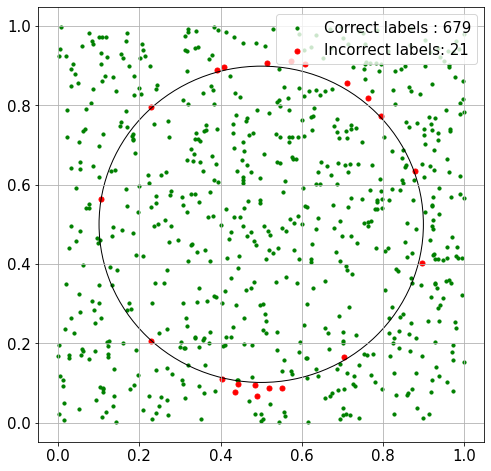

In [475]:
# Plotting
import matplotlib.pyplot as plt
import numpy as np
def plot(test_input, test_target, model):
    correct_labels = []
    incorrect_labels = []
    for b in range(0, test_input.size(0), mini_batch_size):
        
        output = model.forward(test_input.narrow(0, b, mini_batch_size))
        targets = test_target.narrow(0, b, mini_batch_size)
        for pred, target, point in zip(output, targets, test_input_.narrow(0,b,mini_batch_size)):
            if((pred >= 0.5 and target == 1) or (pred < 0.5 and target == 0)):
                correct_labels.append(np.array(point))
            else: 
                #print(pred)
                incorrect_labels.append(np.array(point))
    correct_labels, incorrect_labels = np.array(correct_labels), np.array(incorrect_labels)
    
    plt.rcParams.update({'font.size': 15})
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca()
    plt.grid()
    plt.scatter(correct_labels[:,0], correct_labels[:,1], 
                label = "Correct labels : "+str(correct_labels.shape[0]), 
                s = 10, marker='o', color='green')
    plt.scatter(incorrect_labels[:,0], incorrect_labels[:,1], 
                label = "Incorrect labels: "+str(incorrect_labels.shape[0]),
                s = 25, marker='o', color='red')
    plt.legend(loc = 'upper right', prop={'size': 15})
    circle = plt.Circle((0.5, 0.5), (1/math.sqrt(2*math.pi)), color='black', fill=False)
    ax.add_patch(circle)
    
    plt.savefig("maxi_labeling_solide.png")
    plt.show()
    return incorrect_labels

inc = plot(test_input, test_target, model)

In [468]:
a = torch.randn(10, 2)
b = torch.randn(10, 2)
a[3] = 14
b[3] = 14
a=a[rand_idx]
b=b[rand_idx]
print(a, b)

tensor([[ 0.9944, -0.4593],
        [-1.9413, -2.1684],
        [14.0000, 14.0000],
        [ 0.1920,  0.8872],
        [-0.6504, -1.9324],
        [ 0.1860, -0.6046],
        [-0.6179, -0.7207],
        [ 0.3203, -0.1914],
        [-0.7968,  0.0567],
        [-0.2519,  1.5276]]) tensor([[ 0.0614, -1.3867],
        [ 0.0434, -1.3591],
        [14.0000, 14.0000],
        [-1.5172,  0.7916],
        [-0.2180,  0.3057],
        [-0.8021, -0.2690],
        [ 0.4582, -0.1566],
        [-0.1280,  0.1787],
        [-1.1497, -0.4478],
        [-0.3556, -0.1480]])


In [469]:
old_solide = model

In [357]:
sum_ = 0.
for element in inc:
    sum_ += (element[0]**2 + element[1]**2)
    
print(sum_ / len(inc))

1.8583996986760847
0.3989422804014327


In [809]:
a = torch.randn(10, 1)
b = torch.randn(1, 10)
print(torch.matmul(a,b).shape)

torch.Size([10, 10])


In [181]:
### je fais un brouyons pour voir la structure global
#from data.py import generate_dataset
#from modules.py import relu, drelu, sigma, dsigma, forward_pass, backward_pass, loss, dloss, optimizer
#upload les datas
train_input, train_target = generate_dataset(1000)
test_input, test_target = generate_dataset(1000)
nb_train_samples = train_input.size(0)
#parametres du network
nb_layers = 3
nb_poids = 25
lr = 0.1 / train_input.size(0)
#variance des poids a definir
epsilon = 0.0001
error = []
#init 3 hidden layers
w1 = torch.empty(nb_poids, train_input.size(1)).normal_(0, epsilon)
b1 = torch.empty(nb_poids).normal_(0, epsilon)
w2 = torch.empty(nb_poids, nb_poids).normal_(0, epsilon)
b2 = torch.empty(nb_poids).normal_(0, epsilon)
w3 = torch.empty(1,nb_poids).normal_(0, epsilon)
b3 = torch.empty(1).normal_(0, epsilon)

dl_dw1 = torch.empty(w1.size())
dl_db1 = torch.empty(b1.size())
dl_dw2 = torch.empty(w2.size())
dl_db2 = torch.empty(b2.size())
dl_dw3 = torch.empty(w3.size())
dl_db3 = torch.empty(b3.size())

nb_epochs = 20
for epoch in range(nb_epochs):
    err = 0.
    dl_dw1.zero_()
    dl_db1.zero_()
    dl_dw2.zero_()
    dl_db2.zero_()
    for i in range(train_input.size()[0]):
    
        #model.forward()
        s1 = forward_pass(train_input[i], w1, b1)
        x1 = relu(s1)
        s2 = forward_pass(x1, w2, b2)
        x2 = relu(s2)
        s3 = forward_pass(x2, w3, b3)
        x3 = tanh(s3)
        
        
        
        if (x3 <= 0.5 and train_target[i] == 1) or (x3 > 0.5 and train_target[i] == 0) :
            err += 1
        #print(train_target[i],x3)
        #model.backward()
        backward_pass(w1, b1, w2, b2, w3, b3,
                    train_target[i],
                    train_input[i], s1, x1, s2, x2, s3, x3,
                    dl_dw1, dl_db1, dl_dw2, dl_db2, dl_dw3, dl_db3)
    print(sigmoid(x3), train_target[i])
    error.append(MSE/train_input.size()[0])
    
    
    # optimizer.step()
    print(w1)
    w1, b1 = optimizer(w1,b1,lr,dl_dw1,dl_db1)
    w2, b2 = optimizer(w2,b2,lr,dl_dw2,dl_db2)
    w3, b3 = optimizer(w3,b3,lr,dl_dw3,dl_db3)

    
    
    
    
    
print(error, "error")
s1 = forward_pass(torch.transpose(test_input, 0, 1), w1, b1[:,None])
x1 = tanh(s1)
s2 = forward_pass(x1, w2, b2[:,None])
x2 = tanh(s2)
s3 = forward_pass(x2, w3, b3[:,None])
x3 = tanh(s3)
y = x3
print(loss(y,test_target), "loss")

0.0001
tensor([0.5000]) tensor(0)
tensor([0.4999]) tensor(0)


KeyboardInterrupt: 

In [160]:
a = torch.tensor([0.51])

In [21]:
print(a.add(-0.5).sign().add(1).div(2).long())

tensor([1])


In [39]:
train_target

tensor([0, 0, 1, 0, 1])